## Litige des brevets 

In [6]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [8]:
data=pd.read_csv('Dataset_Thuy.csv')

In [12]:
data.head()

,appln_id,pub_nbr,year_filing,tech_field,patent_scope,family_size,grant_lag,bwd_cits,npl_cits,claims,...,NPE_filed,NPE_acquired_pre_grant,UNIVERSITY,INDIVIDUAL,country_JP_PAD,country_US_PAD,small_applicant,transfer_pre_grant,foreign_priority,gov_int
0,49930230,US06334220,1999,34,1,1,903,29,0,4.0,...,0,0,0,0,0,1,1,0,0,0
1,50447559,US06334221,1999,34,2,6,733,28,0,18.0,...,0,0,0,0,0,0,0,0,1,0
2,52387501,US06334222,2000,34,1,1,510,12,0,3.0,...,0,0,0,0,0,0,0,0,0,0
3,52677204,US06334223,2000,34,1,1,459,6,0,16.0,...,0,0,0,0,0,0,0,0,0,0
4,51046210,US06334224,1999,13,1,1,754,15,0,12.0,...,0,0,0,0,0,1,1,0,0,0


In [14]:
data.head().T

,0,1,2,3,4
appln_id,49930230,50447559,52387501,52677204,51046210
pub_nbr,US06334220,US06334221,US06334222,US06334223,US06334224
year_filing,1999,1999,2000,2000,1999
tech_field,34,34,34,34,13
patent_scope,1,2,1,1,1
family_size,1,6,1,1,1
grant_lag,903,733,510,459,754
bwd_cits,29,28,12,6,15
npl_cits,0,0,0,0,0
claims,4.0,18.0,3.0,16.0,12.0


Pour regarder la matrice de corrélation, on va enlever les variables d'identification qui n'ont pas de rapport avec la variable de prédiction.
Variable de prédiciton: infringement et  invalidity 
De plus, on remarque que la variable 'Year_Litigation' comporte des valeurs NaNs.On va aussi enlever cette variable. Intuitivement il ne devrait pas avoir de corrélation entre l'année de litige et si le fait qu'un brevet soit en litige ou non. 

In [17]:
print(data.columns)

Index(['appln_id', 'pub_nbr', 'year_filing', 'tech_field', 'patent_scope',
       'family_size', 'grant_lag', 'bwd_cits', 'npl_cits', 'claims',
       'fwd_cits5', 'generality', 'originality', 'renewal', 'quality_index_4',
       'patent', 'continuation', 'DIV', 'CIP', 'year_grant', 'Year_Litigation',
       'Infringment', 'Invalidity', 'NPE_filed', 'NPE_acquired_pre_grant',
       'UNIVERSITY', 'INDIVIDUAL', 'country_JP_PAD', 'country_US_PAD',
       'small_applicant', 'transfer_pre_grant', 'foreign_priority', 'gov_int'],
      dtype='object')


In [19]:
#retirons applen.id et pub_nbr de notre dataset 

data_copy= data.copy()
data_copy=data_copy.drop(columns=['appln_id','pub_nbr','Infringment','Invalidity','Year_Litigation'])

data_copy.head().T

,0,1,2,3,4
year_filing,1.999000e+03,1.999000e+03,2.000000e+03,2.000000e+03,1.999000e+03
tech_field,3.400000e+01,3.400000e+01,3.400000e+01,3.400000e+01,1.300000e+01
patent_scope,1.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
family_size,1.000000e+00,6.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
grant_lag,9.030000e+02,7.330000e+02,5.100000e+02,4.590000e+02,7.540000e+02
bwd_cits,2.900000e+01,2.800000e+01,1.200000e+01,6.000000e+00,1.500000e+01
npl_cits,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
claims,4.000000e+00,1.800000e+01,3.000000e+00,1.600000e+01,1.200000e+01
fwd_cits5,1.300000e+01,6.000000e+00,1.600000e+01,1.000000e+00,8.000000e+00
generality,4.585667e-01,7.083333e-01,7.708039e-01,0.000000e+00,5.425347e-01


Les variables invadility et onfringment sont les variables de prédictions. 
Nous souhaitons établir un modèle qui pourrait prédire si un brevet serait sujet à un litige ou non. 
Soit il est en litige pour contrefaçon ( infringment) soit sa validité est remise en question. 
Ainsi, on peut regrouper ces deux variables en une seule variable qu'on va appelé 'litige' 
zero si il n'y a pas de litige et 1 si il y a litige ( pour infringment ou invadility). 
celà nous permettra de voir la corrélation entre les différentes variables et cette variable qui sera notre variable de prédiction. 

In [22]:
#création de la avriable de prédiction 'litige'

variables=data[['Infringment','Invalidity']]
variables.head()

,Infringment,Invalidity
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [24]:
p=0
l=[]
s=[]
for i in range (5000):
    if variables['Infringment'][i]==1:
        l.append(i)
    if variables['Invalidity'][i]==1:
        s.append(i)
print(l)
    
print(s)
        

[94, 232, 479, 557, 622, 717, 810, 813, 814, 1114, 1455, 1500, 1507, 1623, 1702, 1740, 1793, 1804, 1854, 1873, 1879, 1905, 1912, 1948, 2083, 2084, 2105, 2384, 2562, 2580, 2603, 2628, 2666, 2750, 2856, 2879, 3224, 3351, 3379, 3442, 3506, 3551, 3784, 3807, 3850, 3861, 3863, 3917, 4068, 4150, 4162, 4188, 4519, 4554, 4612, 4637, 4712]
[1740, 1879, 2279, 2681, 2831, 2855, 2879, 2966, 3506, 3807, 3850, 3863, 4637]


In [26]:
variables.shape

(644021, 2)

In [28]:
prediction=np.zeros(variables.shape[0])
for i in range (variables.shape[0]):
    if variables['Infringment'][i]==1:
        prediction[i]=1
    if variables['Invalidity'][i]==1:
        prediction[i]=1

In [29]:
p=0
l=[]
for i in range (2000,3000):
    if prediction[i]==1:
        l.append(i)
print(l)

[2083, 2084, 2105, 2279, 2384, 2562, 2580, 2603, 2628, 2666, 2681, 2750, 2831, 2855, 2856, 2879, 2966]


In [30]:
#ajt de la nvl variable dans la dataframe 

data_copy['prediction']=prediction

In [34]:
data_copy.head().T

,0,1,2,3,4
year_filing,1.999000e+03,1.999000e+03,2.000000e+03,2.000000e+03,1.999000e+03
tech_field,3.400000e+01,3.400000e+01,3.400000e+01,3.400000e+01,1.300000e+01
patent_scope,1.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
family_size,1.000000e+00,6.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
grant_lag,9.030000e+02,7.330000e+02,5.100000e+02,4.590000e+02,7.540000e+02
bwd_cits,2.900000e+01,2.800000e+01,1.200000e+01,6.000000e+00,1.500000e+01
npl_cits,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
claims,4.000000e+00,1.800000e+01,3.000000e+00,1.600000e+01,1.200000e+01
fwd_cits5,1.300000e+01,6.000000e+00,1.600000e+01,1.000000e+00,8.000000e+00
generality,4.585667e-01,7.083333e-01,7.708039e-01,0.000000e+00,5.425347e-01


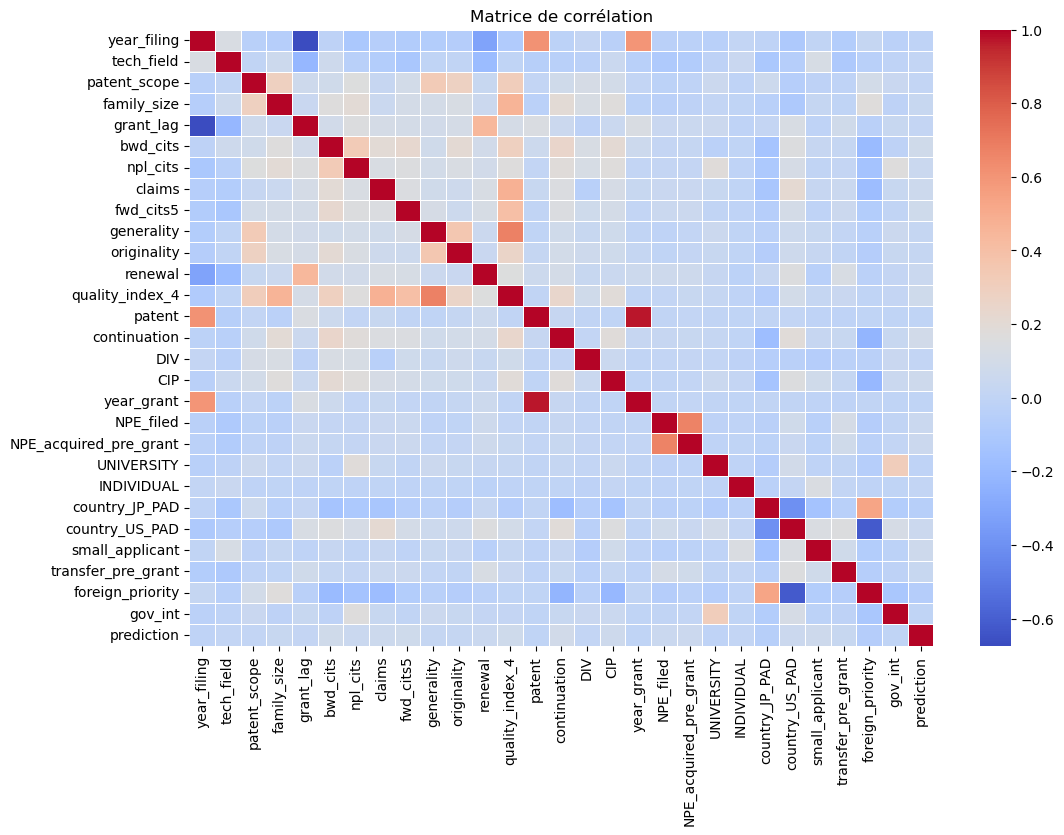

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(data_copy.corr(), annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Matrice de corrélation")
plt.show()


#on a trop de variable 
idée pr reduire le nb de variable :
-on va devoir set a threshold ( mettre un seuil sur la corrélation avec la var prediction pr savoir laquelle on selectionne une variable ou non) le pb c'est que toutes les valeurs de corrélation avec la var prediction sont très faibles 
-Reduction de dimensions ?  
-regrouper les variables corréllés entre elle en une seule? ex( Country_jap , country_us et foreign priority? )
(#quality_index et generality 

## Séparation en 2 sous groupe 

In [52]:
column_names=data_copy.columns
column_names.size

29

In [74]:
# 28 variables d'entrainement 

groupe1=data_copy.iloc[:,0:14]
groupe2=data_copy.iloc[:,14:28]

groupe1.head()


,year_filing,tech_field,patent_scope,family_size,grant_lag,bwd_cits,npl_cits,claims,fwd_cits5,generality,originality,renewal,quality_index_4,patent
0,1999,34,1,1,903,29,0,4.0,13,0.458567,0.757166,7,0.242678,6334220
1,1999,34,2,6,733,28,0,18.0,6,0.708333,0.801427,11,0.375256,6334221
2,2000,34,1,1,510,12,0,3.0,16,0.770804,0.533333,6,0.304927,6334222
3,2000,34,1,1,459,6,0,16.0,1,0.000000,0.694215,6,0.076479,6334223
4,1999,13,1,1,754,15,0,12.0,8,0.542535,0.777778,7,0.196977,6334224


In [76]:
groupe2.head()

,continuation,DIV,CIP,year_grant,NPE_filed,NPE_acquired_pre_grant,UNIVERSITY,INDIVIDUAL,country_JP_PAD,country_US_PAD,small_applicant,transfer_pre_grant,foreign_priority,gov_int
0,1,0,1,2002,0,0,0,0,0,1,1,0,0,0
1,0,0,0,2002,0,0,0,0,0,0,0,0,1,0
2,0,0,0,2002,0,0,0,0,0,0,0,0,0,0
3,0,0,0,2002,0,0,0,0,0,0,0,0,0,0
4,0,0,0,2002,0,0,0,0,0,1,1,0,0,0


In [83]:
from sklearn.model_selection import train_test_split 

x_train1,x_test1,y_train1,y_test1=train_test_split(groupe1,data_copy['prediction'],test_size=0.2,random_state=42)

x_train2,x_test2,y_train2,y_test2=train_test_split(groupe2,data_copy['prediction'],test_size=0.2,random_state=42)

In [87]:
#model random forest 

from sklearn.ensemble import RandomForestClassifier 

model1=RandomForestClassifier(max_depth=10,min_samples_split=5,random_state=42)

model1.fit(x_train1,y_train1)

RandomForestClassifier(max_depth=10, min_samples_split=5, random_state=42)

In [89]:
model1.feature_importances_

array([0.02725831, 0.07137525, 0.0220192 , 0.05922485, 0.07588956,
       0.10126829, 0.0549671 , 0.07117292, 0.12045197, 0.07736204,
       0.0751606 , 0.05407235, 0.12090739, 0.06887015])

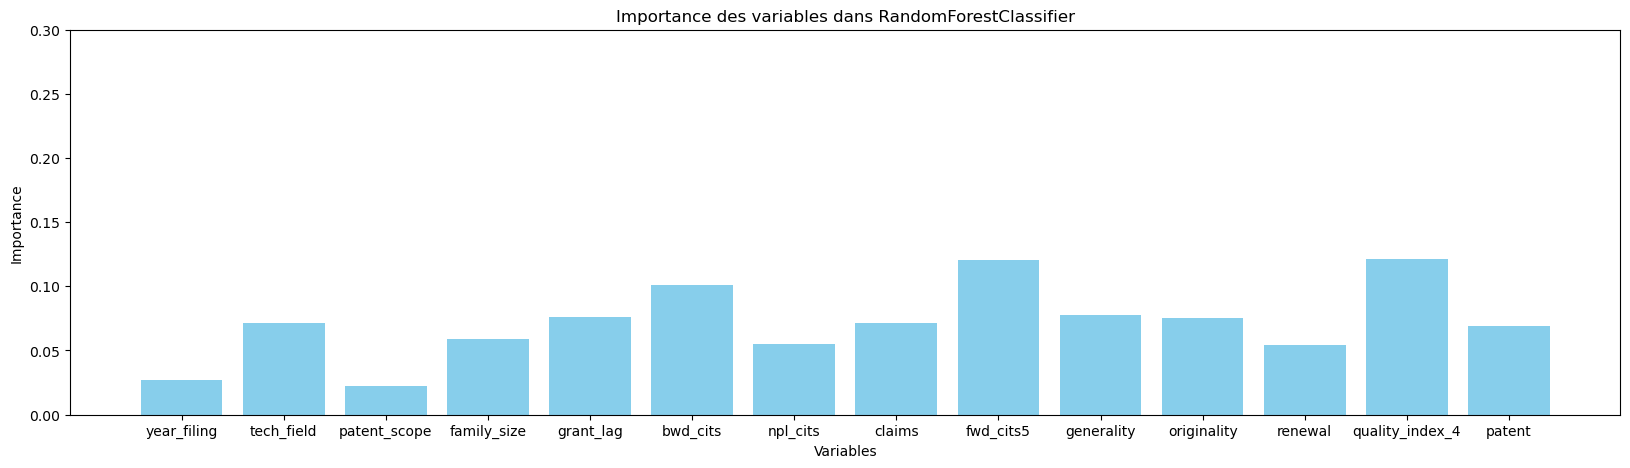

In [113]:
importances = model1.feature_importances_
feature_names = groupe1.columns


plt.figure(figsize=(20, 5))
plt.bar(feature_names, importances, color='skyblue')
plt.xlabel("Variables")
plt.ylim(0,0.3)
plt.ylabel("Importance")
plt.title("Importance des variables dans RandomForestClassifier")
plt.show()

In [107]:

model2=RandomForestClassifier(max_depth=10,min_samples_split=5,random_state=42)

model2.fit(x_train2,y_train2)

RandomForestClassifier(max_depth=10, min_samples_split=5, random_state=42)

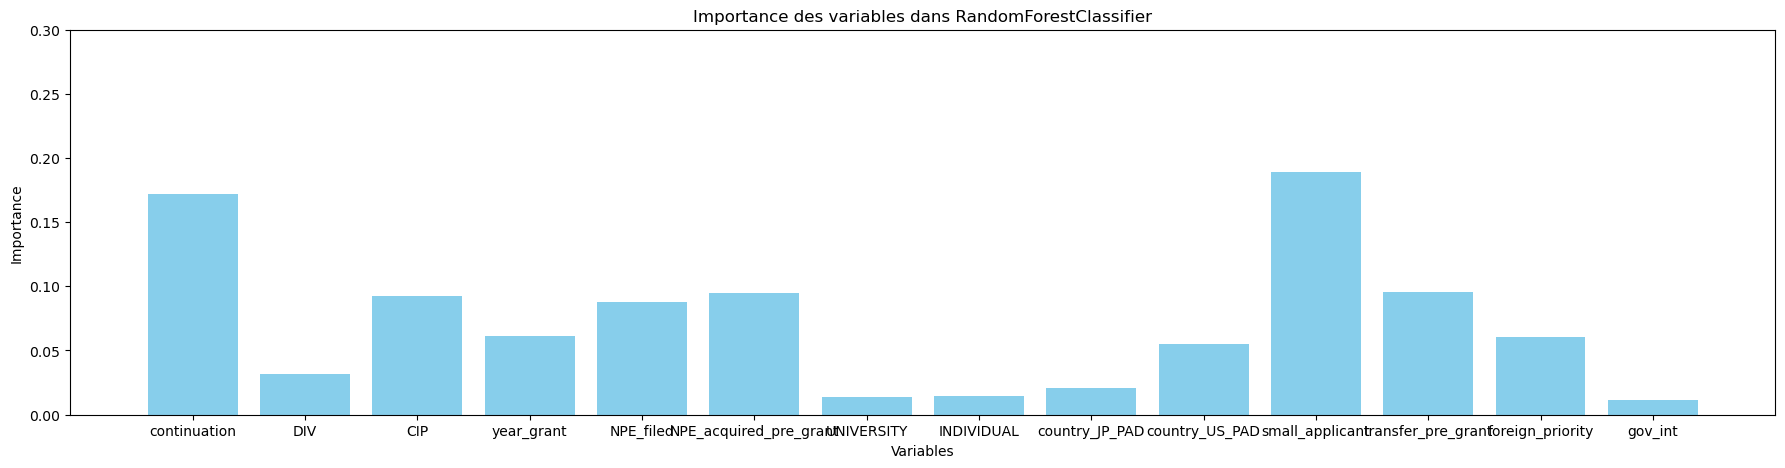

In [115]:
importances = model2.feature_importances_
feature_names = groupe2.columns


plt.figure(figsize=(22, 5))
plt.bar(feature_names, importances, color='skyblue')
plt.xlabel("Variables")
plt.ylim(0,0.3)
plt.ylabel("Importance")
plt.title("Importance des variables dans RandomForestClassifier")
plt.show()

In [117]:
#voyons la performance de nos modèles 

from sklearn.metrics import roc_auc_score, precision_score, recall_score 

y_pred1=model1.predict(x_test1)

y_pred2=model2.predict(x_test2)


In [135]:

recall=recall_score(y_test1,y_pred1)
precision=precision_score(y_test1,y_pred1)
roc_auc=roc_auc_score(y_test1,y_pred1)

print('recall=',recall)
print('precision=',precision)
print('roc_auc=',roc_auc)

recall= 0.0005913660555884093
precision= 1.0
roc_auc= 0.5002956830277943


In [151]:
recall=recall_score(y_test2,y_pred2)
precision=precision_score(y_test2,y_pred2)
roc_auc=roc_auc_score(y_test2,y_pred2)

In [153]:
print('recall=',recall)
print('precision=',precision)
print('roc_auc=',roc_auc)

recall= 0.0005913660555884093
precision= 0.25
roc_auc= 0.5002838825966852


## Test performance model sans reduction de variables d'entrée 

In [177]:
# Model avec les 28 variables 

x_train,x_test,y_train,y_test=train_test_split(data_copy.iloc[:,0:28],data_copy['prediction'],test_size=0.2,random_state=42)

model28=RandomForestClassifier(max_depth=10,min_samples_split=5,random_state=42)
model28.fit(x_train,y_train)

RandomForestClassifier(max_depth=10, min_samples_split=5, random_state=42)

In [179]:
y_pred=model28.predict(x_test)
recall=recall_score(y_test,y_pred)
precision=precision_score(y_test,y_pred)
roc_auc=roc_auc_score(y_test,y_pred)

print('recall=',recall)
print('precision=',precision)
print('roc_auc=',roc_auc)

recall= 0.002365464222353637
precision= 0.8
roc_auc= 0.5011787986341404


In [149]:
# dans notre contexte, 

#classifier un brevet comme étant non postif (n'est pas succeptible de faire objet de litige)
#est pire que classifier un brevet non positif en tant que positif  , pour les raisons financières. 

#donc le metric le plus important pour nous c'est d'abord le RECALL score 

#recall=True Positive / ( True postive+ False negative)

#on veut d'assurer que les brevets positif ont bien été capturé 



## test model avec reduction ( selection des meileurs var du grp 1 et 2 ) 

In [171]:
#selection variables à partir groupe 1 et groupe 2 

feature_names=groupe1.columns
selected_indices = model1.feature_importances_ > 0.05
selected_features1 = feature_names[selected_indices]

feature_names=groupe2.columns
selected_indices = model2.feature_importances_ > 0.05
selected_features2 = feature_names[selected_indices]



print(selected_features1)
print(selected_features2)

all_selected_features = np.unique(np.concatenate((selected_features1, selected_features2)))

# Création d'un DataFrame contenant uniquement les variables sélectionnées
df_filtered = data_copy[all_selected_features]
df_filtered.columns

Index(['tech_field', 'family_size', 'grant_lag', 'bwd_cits', 'npl_cits',
       'claims', 'fwd_cits5', 'generality', 'originality', 'renewal',
       'quality_index_4', 'patent'],
      dtype='object')
Index(['continuation', 'CIP', 'year_grant', 'NPE_filed',
       'NPE_acquired_pre_grant', 'country_US_PAD', 'small_applicant',
       'transfer_pre_grant', 'foreign_priority'],
      dtype='object')


Index(['CIP', 'NPE_acquired_pre_grant', 'NPE_filed', 'bwd_cits', 'claims',
       'continuation', 'country_US_PAD', 'family_size', 'foreign_priority',
       'fwd_cits5', 'generality', 'grant_lag', 'npl_cits', 'originality',
       'patent', 'quality_index_4', 'renewal', 'small_applicant', 'tech_field',
       'transfer_pre_grant', 'year_grant'],
      dtype='object')

In [ ]:
#Model avec reduction 

In [173]:
x_train,x_test,y_train,y_test=train_test_split(df_filtered,data_copy['prediction'],test_size=0.2,random_state=42)

model=RandomForestClassifier(max_depth=10,min_samples_split=5,random_state=42)
model.fit(x_train,y_train)

RandomForestClassifier(max_depth=10, min_samples_split=5, random_state=42)

In [175]:
y_pred=model.predict(x_test)
recall=recall_score(y_test,y_pred)
precision=precision_score(y_test,y_pred)
roc_auc=roc_auc_score(y_test,y_pred)

print('recall=',recall)
print('precision=',precision)
print('roc_auc=',roc_auc)

recall= 0.004139562389118865
precision= 0.875
roc_auc= 0.5020658477175232


## Test model performance avec reduction mais  selection de variables sans séparer en 2 sous groupe

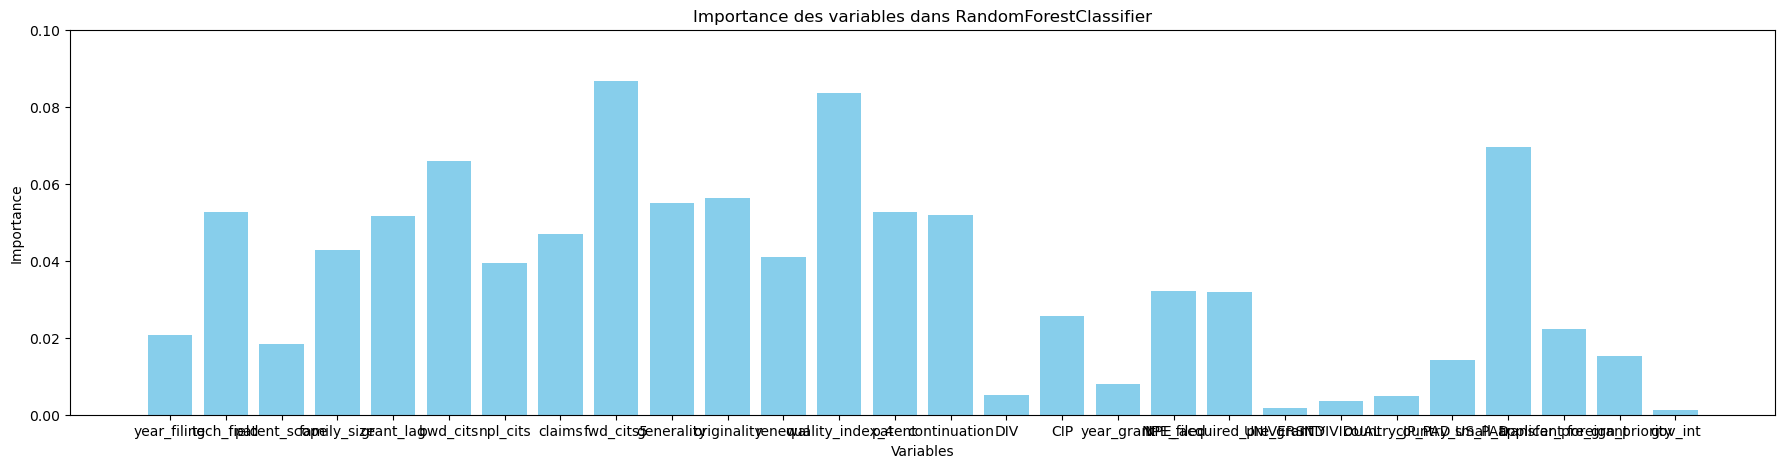

Index(['tech_field', 'grant_lag', 'bwd_cits', 'fwd_cits5', 'generality',
       'originality', 'quality_index_4', 'patent', 'continuation',
       'small_applicant'],
      dtype='object')


In [191]:
importances = model28.feature_importances_
feature_names = data_copy.iloc[:,0:28].columns


plt.figure(figsize=(22, 5))
plt.bar(feature_names, importances, color='skyblue')
plt.xlabel("Variables")
plt.ylim(0,0.1)
plt.ylabel("Importance")
plt.title("Importance des variables dans RandomForestClassifier")
plt.show()

feature_names=data_copy.iloc[:,0:28].columns
selected_indices = model28.feature_importances_ > 0.05
selected_features28 = feature_names[selected_indices]
print(selected_features28)

In [205]:
df_filtered = data_copy[selected_features28]

x_train,x_test,y_train,y_test=train_test_split(df_filtered,data_copy['prediction'],test_size=0.2,random_state=42)

model=RandomForestClassifier(max_depth=10,min_samples_split=5,random_state=42)
model.fit(x_train,y_train)




RandomForestClassifier(max_depth=10, min_samples_split=5, random_state=42)

In [201]:
df_filtered = data_copy[selected_features28]
df_filtered.head()

,tech_field,grant_lag,bwd_cits,fwd_cits5,generality,originality,quality_index_4,patent,continuation,small_applicant
0,34,903,29,13,0.458567,0.757166,0.242678,6334220,1,1
1,34,733,28,6,0.708333,0.801427,0.375256,6334221,0,0
2,34,510,12,16,0.770804,0.533333,0.304927,6334222,0,0
3,34,459,6,1,0.000000,0.694215,0.076479,6334223,0,0
4,13,754,15,8,0.542535,0.777778,0.196977,6334224,0,1


In [209]:
y_pred=model.predict(x_test)
unique, counts = np.unique(y_pred, return_counts=True)
print(dict(zip(unique, counts)))


{0.0: 128805}


In [203]:
y_pred=model.predict(x_test)
recall=recall_score(y_test,y_pred)
precision=precision_score(y_test,y_pred)
roc_auc=roc_auc_score(y_test,y_pred)

print('recall=',recall)
print('precision=',precision)
print('roc_auc=',roc_auc)

recall= 0.0
precision= 0.0
roc_auc= 0.5


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
